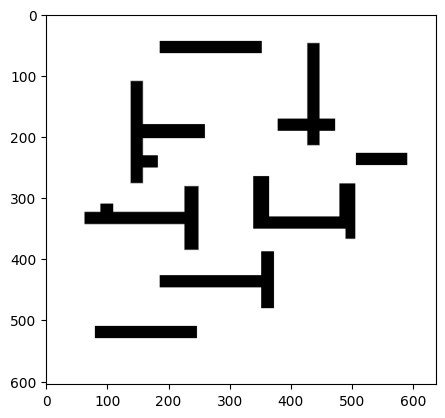

In [1]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./generated_images/u_shape.png"))

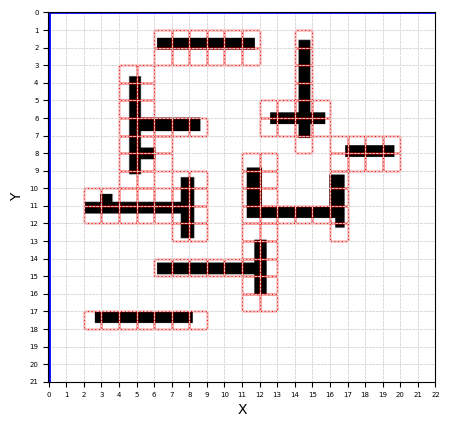

In [3]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./generated_images/u_shape.png", grid_size=30)
map.draw_coordinate_system()

In [5]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 194
Elapsed Time: 0.017888784408569336 seconds
path length = 32


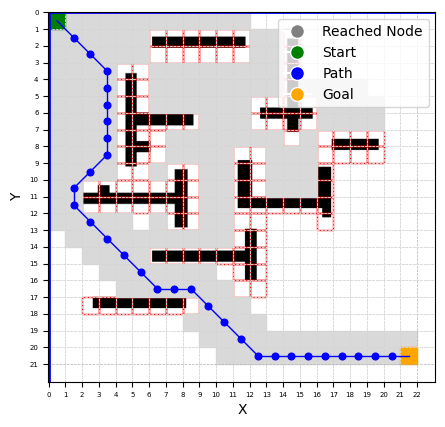

In [6]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.005842924118041992 seconds
path length = 32


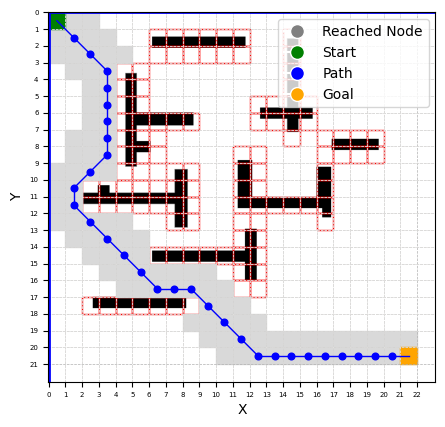

In [7]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [8]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

In [9]:
simplified_path

[(0, 0),
 array([ 1, 11]),
 array([ 1, 11]),
 array([ 7, 16]),
 array([ 8, 16]),
 array([ 8, 16]),
 array([20, 20]),
 array([21, 20])]

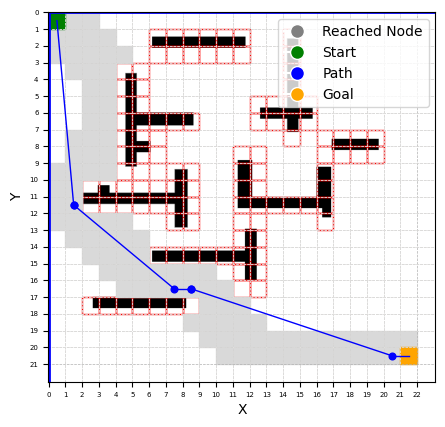

In [10]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  910
------------Generation 1 -----------------
Population size:  910
Mean fit_value:  -3349.3275030809964
Mean path_value:  33.53304182071653
Mean smooth_value:  26.786666666666665
Best path:  [0, 331, 361, 384, 461]
------------Generation 2 -----------------
Population size:  900
Mean fit_value:  -3055.110169663767
Mean path_value:  33.51869591304249
Mean smooth_value:  23.847362514029182
Best path:  [0, 331, 361, 384, 461]
Path grid numbers:  [0, 331, 361, 384, 461]
Path grid coordinates:  [(0, 0), (1, 15), (9, 16), (10, 17), (21, 20)]


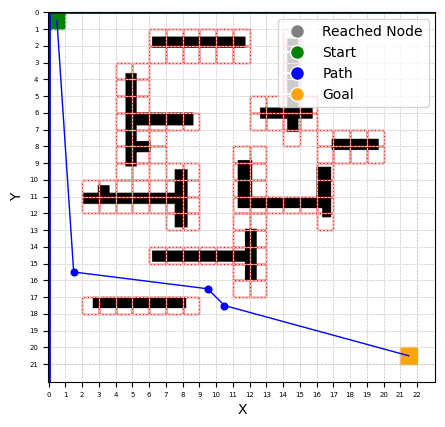

In [11]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=2, initial_population_size=1, 
                p_crossover=1, p_mutation=0.05, verbose=True)

map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])